Consider the weather data provided to you, file name: 'WD-MidSem. csv'. Given that the three core features are precipitation, maximum temperature and minimum temperature. The data for these features are in the columns PRCP, TMAX and TMIN respectively. (B. 1) How many rows and columns are there in the data-set? How many fraction of NaN values in each column? (B. 2) Clean-up the data appropriately to remove/replace NaN values from each column. (B. 3) Predict next day weather for a month, specifically, next day 'MIN' for December, 2009, using Ridge regression with parameter (1) a = 0 and (2) a = 0.1. You can use any appropriate amount of training data-set as you deem fit. (B. 4) For both the cases (1) print the errors in predictions and (2) plot the predicted values along with the actual values.

In [4]:
import pandas as pd 

In [5]:
wdata = pd.read_csv("WD.csv", index_col = "DATE")
wdata.head()

,PRCP,SNOW,SNWD,TMAX,TMIN,ACSH,WDF1,WT03
DATE,,,,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0,NaN,NaN,NaN
1960-01-02,0.0,0.0,0.0,49.0,29.0,NaN,NaN,NaN
1960-01-03,0.0,0.0,0.0,54.0,35.0,NaN,NaN,NaN
1960-01-04,0.0,0.0,0.0,54.0,36.0,NaN,NaN,NaN
1960-01-05,0.0,0.0,0.0,55.0,33.0,NaN,NaN,NaN


In [6]:
# Get the number of rows and columns
num_rows, num_columns = wdata.shape
# Print the results
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 17087
Number of columns: 8


In [7]:
# Calculate the fraction of NaN values in each column
wdata.apply(pd.isnull).sum()/wdata.shape[0]

PRCP    0.016445
SNOW    0.333997
SNWD    0.326740
TMAX    0.000527
TMIN    0.000585
ACSH    0.657986
WDF1    0.657986
WT03    0.992977
dtype: float64

In [8]:
# Replace NaN values with the mean of each column
cleaned_data = wdata.fillna(wdata.mean())
cleaned_data

,PRCP,SNOW,SNWD,TMAX,TMIN,ACSH,WDF1,WT03
DATE,,,,,,,,
1960-01-01,0.0,0.000000,0.0,49.0,30.0,47.920945,250.855578,1.0
1960-01-02,0.0,0.000000,0.0,49.0,29.0,47.920945,250.855578,1.0
1960-01-03,0.0,0.000000,0.0,54.0,35.0,47.920945,250.855578,1.0
1960-01-04,0.0,0.000000,0.0,54.0,36.0,47.920945,250.855578,1.0
1960-01-05,0.0,0.000000,0.0,55.0,33.0,47.920945,250.855578,1.0
...,...,...,...,...,...,...,...,...
2022-09-08,0.0,0.000088,0.0,94.0,62.0,47.920945,250.855578,1.0
2022-09-09,0.0,0.000088,0.0,79.0,60.0,47.920945,250.855578,1.0
2022-09-10,0.0,0.000088,0.0,76.0,60.0,47.920945,250.855578,1.0


In [9]:
cleaned_data.apply(pd.isnull).sum()/cleaned_data.shape[0]

PRCP    0.0
SNOW    0.0
SNWD    0.0
TMAX    0.0
TMIN    0.0
ACSH    0.0
WDF1    0.0
WT03    0.0
dtype: float64

In [10]:
cleaned_data["target"] = cleaned_data.shift(-1)["TMIN"]
cleaned_data

,PRCP,SNOW,SNWD,TMAX,TMIN,ACSH,WDF1,WT03,target
DATE,,,,,,,,,
1960-01-01,0.0,0.000000,0.0,49.0,30.0,47.920945,250.855578,1.0,29.0
1960-01-02,0.0,0.000000,0.0,49.0,29.0,47.920945,250.855578,1.0,35.0
1960-01-03,0.0,0.000000,0.0,54.0,35.0,47.920945,250.855578,1.0,36.0
1960-01-04,0.0,0.000000,0.0,54.0,36.0,47.920945,250.855578,1.0,33.0
1960-01-05,0.0,0.000000,0.0,55.0,33.0,47.920945,250.855578,1.0,38.0
...,...,...,...,...,...,...,...,...,...
2022-09-08,0.0,0.000088,0.0,94.0,62.0,47.920945,250.855578,1.0,60.0
2022-09-09,0.0,0.000088,0.0,79.0,60.0,47.920945,250.855578,1.0,60.0
2022-09-10,0.0,0.000088,0.0,76.0,60.0,47.920945,250.855578,1.0,64.0


In [13]:
fwdata = cleaned_data.iloc[:-1:].copy()
fwdata


,PRCP,SNOW,SNWD,TMAX,TMIN,ACSH,WDF1,WT03,target
DATE,,,,,,,,,
1960-01-01,0.0,0.000000,0.0,49.0,30.0,47.920945,250.855578,1.0,29.0
1960-01-02,0.0,0.000000,0.0,49.0,29.0,47.920945,250.855578,1.0,35.0
1960-01-03,0.0,0.000000,0.0,54.0,35.0,47.920945,250.855578,1.0,36.0
1960-01-04,0.0,0.000000,0.0,54.0,36.0,47.920945,250.855578,1.0,33.0
1960-01-05,0.0,0.000000,0.0,55.0,33.0,47.920945,250.855578,1.0,38.0
...,...,...,...,...,...,...,...,...,...
2022-09-07,0.0,0.000088,0.0,91.0,64.0,47.920945,250.855578,1.0,62.0
2022-09-08,0.0,0.000088,0.0,94.0,62.0,47.920945,250.855578,1.0,60.0
2022-09-09,0.0,0.000088,0.0,79.0,60.0,47.920945,250.855578,1.0,60.0


In [15]:
from sklearn.linear_model import Ridge
# initialize the model
reg_model = Ridge(alpha=0) # alpha is the parameter to prevent Overfitting
pred_features = ["PRCP","TMAX", "TMIN"]

# Define Training and Testing data Set:
train_set = fwdata.loc[:"2010-12-31"]
test_set = fwdata.loc["2009-12-01":"2009-12-31"]

# Train the data set using ML Algorithm: Fit the model
reg_model.fit(train_set[pred_features], train_set["target"])

reg_model.coef_

array([-0.84105968,  0.13329045,  0.75267731])

In [16]:
from sklearn.linear_model import Ridge
# initialize the model
reg_model1 = Ridge(alpha=0.1) # alpha is the parameter to prevent Overfitting
pred_features = ["PRCP","TMAX", "TMIN"]

# Define Training and Testing data Set:
train_set = fwdata.loc[:"2010-12-31"]
test_set = fwdata.loc["2009-12-01":"2009-12-31"]

# Train the data set using ML Algorithm: Fit the model
reg_model1.fit(train_set[pred_features], train_set["target"])

reg_model1.coef_

array([-0.84085139,  0.1332921 ,  0.75267599])

In [17]:
prediction = reg_model.predict(test_set[pred_features])
pseries = pd.Series(prediction, index = test_set.index)
print("prediction using alpha 0")

pseries

prediction using alpha 0


DATE
2009-12-01    40.572981
2009-12-02    39.373367
2009-12-03    40.525916
2009-12-04    39.773239
2009-12-05    38.001303
2009-12-06    37.925608
2009-12-07    36.347956
2009-12-08    32.685497
2009-12-09    33.571464
2009-12-10    40.203859
2009-12-11    41.572525
2009-12-12    48.418479
2009-12-13    48.538786
2009-12-14    45.888246
2009-12-15    48.099755
2009-12-16    50.491077
2009-12-17    48.099755
2009-12-18    46.241594
2009-12-19    45.441851
2009-12-20    45.089045
2009-12-21    47.416481
2009-12-22    43.536625
2009-12-23    36.629239
2009-12-24    40.439691
2009-12-25    38.001303
2009-12-26    40.607464
2009-12-27    44.689174
2009-12-28    41.764690
2009-12-29    37.115335
2009-12-30    47.433302
2009-12-31    47.699883
dtype: float64

In [18]:
prediction1 = reg_model1.predict(test_set[pred_features])
pseries1 = pd.Series(prediction1, index = test_set.index)
print("prediction using alpha 0.1")
pseries1

prediction using alpha 0.1


DATE
2009-12-01    40.572981
2009-12-02    39.373352
2009-12-03    40.525904
2009-12-04    39.773228
2009-12-05    38.001292
2009-12-06    37.925616
2009-12-07    36.347962
2009-12-08    32.685484
2009-12-09    33.571452
2009-12-10    40.203835
2009-12-11    41.572521
2009-12-12    48.418549
2009-12-13    48.538756
2009-12-14    45.888236
2009-12-15    48.099741
2009-12-16    50.491061
2009-12-17    48.099741
2009-12-18    46.241589
2009-12-19    45.441837
2009-12-20    45.089037
2009-12-21    47.416463
2009-12-22    43.536608
2009-12-23    36.629232
2009-12-24    40.439689
2009-12-25    38.001292
2009-12-26    40.607501
2009-12-27    44.689161
2009-12-28    41.764672
2009-12-29    37.115324
2009-12-30    47.433281
2009-12-31    47.699865
dtype: float64

In [20]:
from sklearn.metrics import mean_absolute_error 
error = mean_absolute_error(test_set["target"], prediction)
print("error with aplha 0",error)

error = mean_absolute_error(test_set["target"], prediction1)
print("error with aplha 0.1",error)


error with aplha 0 3.4043771157656346
error with aplha 0.1 3.4043719783249347


<AxesSubplot: xlabel='DATE'>

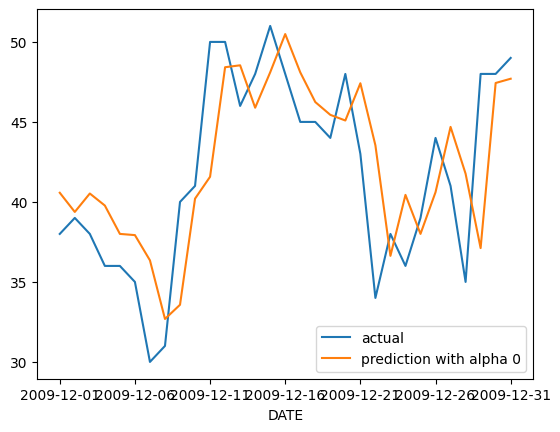

In [21]:
result_df = pd.concat([test_set["target"], pd.Series(prediction, index = test_set.index)],
axis=1)
result_df.columns = ["actual", "prediction with alpha 0"]
result_df.plot()


<AxesSubplot: xlabel='DATE'>

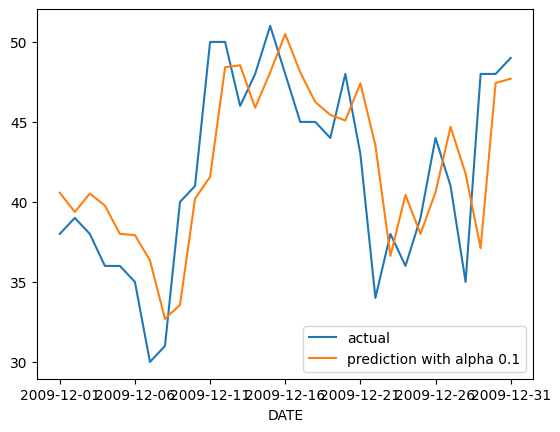

In [22]:
result_df = pd.concat([test_set["target"], pd.Series(prediction1, index = test_set.index)],
axis=1)
result_df.columns = ["actual", "prediction with alpha 0.1"]
result_df.plot()